## Import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from CinePred.data.data import *

In [3]:
print('----- init Data -----')
data = Data('../raw_data/IMDb movies.csv')

print('----- import Data -----')
data.import_data()
data.dataframe

print('----- keep columns -----')
data.keep_columns(columns_names=[
    'imdb_title_id', 'title', 'year', 'date_published', 'genre',
    'duration', 'country', 'director', 'writer', 'production_company',
    'actors', 'budget', 'worlwide_gross_income'
])

print('----- remove na rows -----')
data.remove_na_rows()

print('----- convert budget -----')
data.convert_budget_column(column_name='budget',min_rows=45, out_currency='USD')

print('----- convert income column -----')
data.convert_income(column_name='worlwide_gross_income')

print('----- convert to int -----')
data.convert_to_int('year')
data.convert_to_int('duration')

print('----- convert to date -----')
data.convert_to_date('date_published')

print('----- seasonality Sin/Cos -----')
data.add_sin_cos_features('Month_published')

print('----- reset index -----')
data.reset_index()

print('----- data_shape -----')
print(data.dataframe.shape)

print('----- add_prod_company_category -----')
data.add_prod_company_category("production_company", "production_weight")



----- init Data -----
----- import Data -----
----- keep columns -----
----- remove na rows -----
----- convert budget -----
----- convert income column -----
----- convert to int -----
----- convert to date -----
----- seasonality Sin/Cos -----
----- reset index -----
----- data_shape -----
(12024, 16)
----- add_prod_company_category -----


In [4]:
data.dataframe.columns

Index(['imdb_title_id', 'title', 'year', 'date_published', 'genre', 'duration',
       'country', 'director', 'writer', 'production_company', 'actors',
       'budget', 'worlwide_gross_income', 'Month_published', 'sin_MoPub',
       'cos_MoPub', 'production_weight'],
      dtype='object')

In [5]:
data.dataframe.sample(10)

,imdb_title_id,title,year,date_published,genre,duration,country,director,writer,production_company,actors,budget,worlwide_gross_income,Month_published,sin_MoPub,cos_MoPub,production_weight
10929,tt4711924,Monolith,2016,2017-08-12,"Drama, Thriller",83,Italy,Ivan Silvestrini,"Mauro Uzzeo, Roberto Recchioni",Sky Italia,"Katrina Bowden, Katherine Kelly Lang, Jay Hayd...",1.000000e+06,423981,8,-0.866025,-5.000000e-01,1
2108,tt0111280,Generazioni,1994,1995-03-17,"Action, Adventure, Mystery",118,USA,David Carson,"Gene Roddenberry, Rick Berman",Paramount Pictures,"Patrick Stewart, Jonathan Frakes, Brent Spiner...",3.500000e+07,118071125,3,1.000000,6.123234e-17,5
6922,tt1087906,Ying han,2008,2008-01-01,"Crime, Drama",95,"Hong Kong, China",Sheng Ding,"Sheng Ding, Jing Wong",Ciwen Media,"Ye Liu, Anthony Chau-Sang Wong, Yong You, Yang...",1.162920e+08,1167457,1,0.500000,8.660254e-01,2
6161,tt0821642,Il solista,2009,2010-07-23,"Biography, Drama, Music",117,"UK, France, USA",Joe Wright,"Susannah Grant, Steve Lopez",DreamWorks,"Jamie Foxx, Robert Downey Jr., Catherine Keene...",6.000000e+07,38332994,7,-0.500000,-8.660254e-01,5
3115,tt0175142,"Scary Movie - Senza paura, senza vergogna... s...",2000,2000-11-10,Comedy,88,USA,Keenen Ivory Wayans,"Shawn Wayans, Marlon Wayans",Dimension Films,"Carmen Electra, Dave Sheridan, Frank B. Moore,...",1.900000e+07,278019771,11,-0.500000,8.660254e-01,5
9140,tt2023587,La madre,2013,2013-03-21,"Horror, Thriller",100,"Canada, Spain",Andy Muschietti,"Andy Muschietti, Barbara Muschietti",Universal Pictures,"Jessica Chastain, Nikolaj Coster-Waldau, Megan...",1.500000e+07,146428180,3,1.000000,6.123234e-17,5
4035,tt0312549,Veronica Guerin - Il prezzo del coraggio,2003,2003-10-10,"Biography, Crime, Drama",98,"Ireland, UK, USA",Joel Schumacher,"Carol Doyle, Carol Doyle",Touchstone Pictures,"Cate Blanchett, Gerard McSorley, Ciarán Hinds,...",1.700000e+07,9439660,10,-0.866025,5.000000e-01,5
11517,tt6346162,Disney's Newsies: The Broadway Musical,2017,2017-02-16,Musical,149,USA,"Jeff Calhoun, Brett Sullivan","Harvey Fierstein, Bob Tzudiker",Disney Theatrical Productions (DTP),"Jeremy Jordan, Kara Lindsay, Ben Fankhauser, A...",2.000000e+06,2827489,2,0.866025,5.000000e-01,1
9980,tt2866360,Coherence - Oltre lo spazio tempo,2013,2014-08-06,"Drama, Mystery, Sci-Fi",89,"USA, UK",James Ward Byrkit,"James Ward Byrkit, James Ward Byrkit",Bellanova Films,"Emily Baldoni, Maury Sterling, Nicholas Brendo...",5.000000e+04,139745,8,-0.866025,-5.000000e-01,1
8415,tt1650427,Resturlaub,2011,2011-08-11,Comedy,97,Germany,Gregor Schnitzler,Tommy Jaud,Deutsche Columbia Pictures Film Produktion,"Maximilian Brückner, Mira Bartuschek, Antoine ...",1.157400e+06,6747405,8,-0.866025,-5.000000e-01,1


<AxesSubplot:xlabel='budget', ylabel='worlwide_gross_income'>

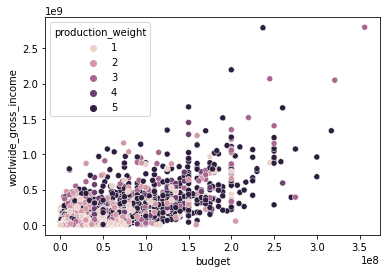

In [6]:
df = data.dataframe
sns.scatterplot(data = df, x='budget', y='worlwide_gross_income', hue='production_weight')

In [7]:
'imdb_title_id'
'title'
'year'
'date_published'
'genre'
'duration'
'country'
'director'
'writer'
'production_company'
'actors'
'budget'
'worlwide_gross_income'
    #'Month_published'
    #'sin_MoPub'
    #'cos_MoPub'
    #'production_weight'

'worlwide_gross_income'

In [17]:
list_of_nbmovies_production = df['production_company'].value_counts()

In [18]:
df['nb_Prod'] = df['production_company'].apply(lambda x : list_of_nbmovies_production[x])
df

,imdb_title_id,title,year,date_published,genre,duration,country,director,writer,production_company,actors,budget,worlwide_gross_income,Month_published,sin_MoPub,cos_MoPub,production_weight,nb_Prod
0,tt0010323,Il gabinetto del dottor Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,Robert Wiene,"Carl Mayer, Hans Janowitz",Decla-Bioscop AG,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",1.800000e+04,8811,2,8.660254e-01,5.000000e-01,1,1
1,tt0011440,Markens grøde,1921,1921-12-02,Drama,107,Norway,Gunnar Sommerfeldt,"Knut Hamsun, Gunnar Sommerfeldt",Christiana Film,"Amund Rydland, Karen Poulsen, Ragna Wettergree...",2.926274e+04,4272,12,-2.449294e-16,1.000000e+00,1,1
2,tt0012190,I quattro cavalieri dell'Apocalisse,1921,1923-04-16,"Drama, Romance, War",150,USA,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",8.000000e+05,9183673,4,8.660254e-01,-5.000000e-01,1,1
3,tt0012349,Il monello,1921,1923-11-26,"Comedy, Drama, Family",68,USA,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",2.500000e+05,26916,11,-5.000000e-01,8.660254e-01,3,8
4,tt0014624,La donna di Parigi,1923,1927-06-06,"Drama, Romance",82,USA,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Edna Purviance, Clarence Geldart, Carl Miller,...",3.510000e+05,11233,6,1.224647e-16,-1.000000e+00,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12019,tt9877340,Nalpathiyonnu,2019,2019-11-08,"Drama, Romance",134,India,Lal Jose,P.G. Prageesh,Signature Studios,"Biju Menon, Sharanjith, Nimisha Sajayan, Dhany...",6.626285e+05,42104,11,-5.000000e-01,8.660254e-01,1,1
12020,tt9878242,Subharathri,2019,2019-07-06,"Drama, Romance",130,India,Vyasan K.P.,"Vyasan K.P., Vyasan K.P.",Abaam Movies,"Dileep, Anu Sithara, Siddique, Suraj Venjaramo...",3.975771e+05,105932,7,-5.000000e-01,-8.660254e-01,1,1
12021,tt9886872,Munthiri Monchan,2019,2019-12-06,"Comedy, Romance",130,India,Vijith Nambiar,"Manu Gopal, Meharali Poilungal Ismail",Vishvas Movies,"Manesh Krishnan, Gopika Anil, Salim Kumar, Dev...",3.975771e+05,2568,12,-2.449294e-16,1.000000e+00,1,1
12022,tt9900782,Kaithi,2019,2019-10-25,"Action, Thriller",145,India,Lokesh Kanagaraj,"Lokesh Kanagaraj, Pon Parthiban",Dream Warrior Pictures,"Karthi, Narain, Ramana, George Maryan, Harish ...",3.180617e+06,524061,10,-8.660254e-01,5.000000e-01,2,5


<AxesSubplot:xlabel='index', ylabel='production_weight'>

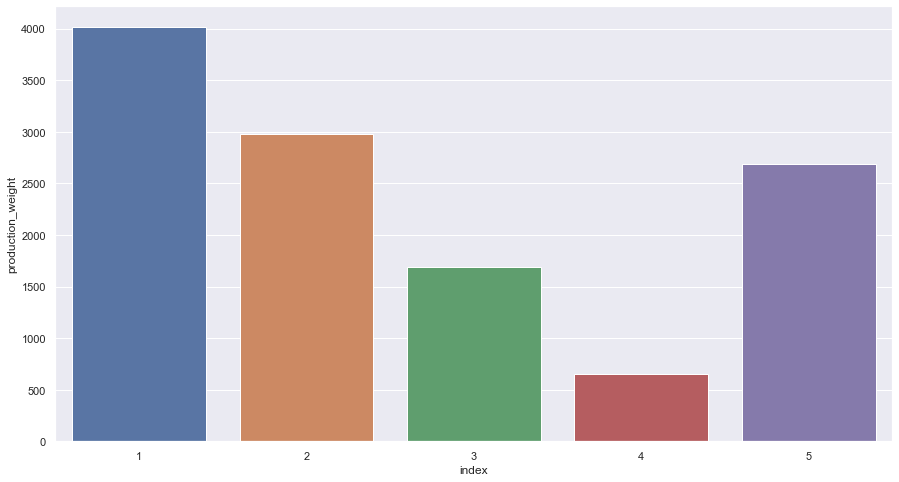

In [144]:
from scipy import stats
sns.set(rc={'figure.figsize':(15,8)})

column_to_plot = 'production_weight'
df_toplot = pd.DataFrame(df[column_to_plot].value_counts().reset_index())
sns.barplot(x=df_toplot['index'],y=df_toplot[column_to_plot])
#sns.histplot(df_toplot[column_to_plot])
#sns.histplot(data = np.log(df[column_to_plot])/np.log(10))